In [24]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns

In [25]:
train=pd.read_csv("train_HK6lq50.csv")
test=pd.read_csv("test_2nAIblo.csv")

In [26]:
train.nunique()

id                           73147
program_id                      22
program_type                     7
program_duration                10
test_id                        188
test_type                        2
difficulty_level                 4
trainee_id                   18500
gender                           2
education                        5
city_tier                        4
age                             45
total_programs_enrolled         13
is_handicapped                   2
trainee_engagement_rating        5
is_pass                          2
dtype: int64

In [4]:
train['is_pass'].value_counts(normalize = True)

1    0.695408
0    0.304592
Name: is_pass, dtype: float64

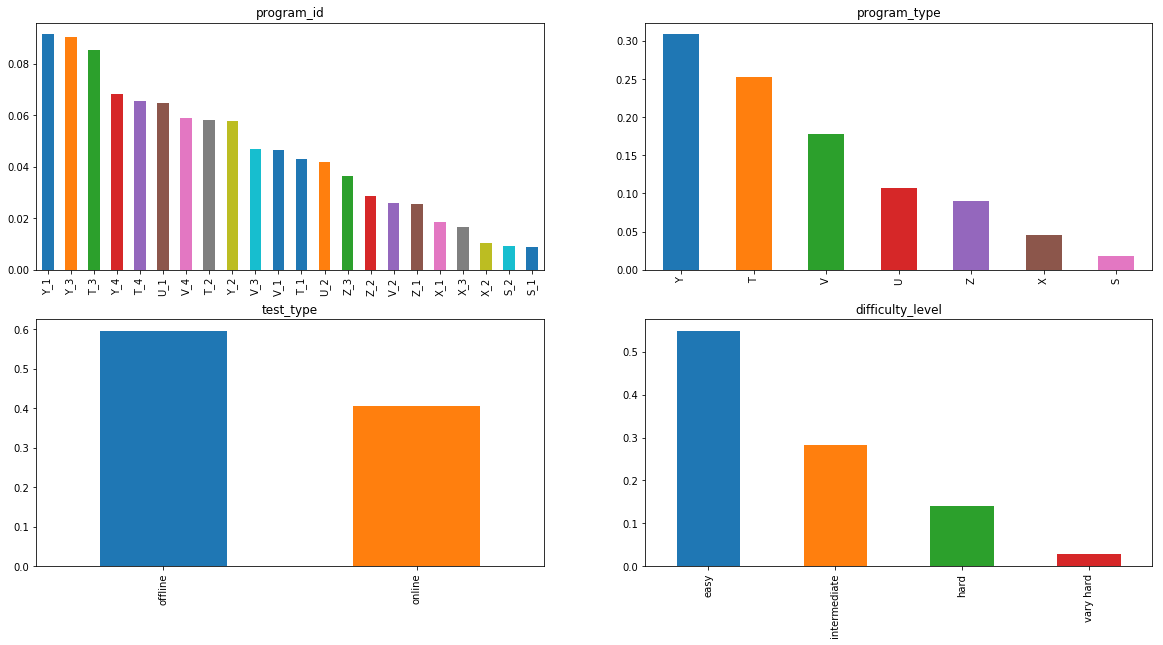

In [5]:
plt.figure(1)
plt.subplot(221)
train['program_id'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'program_id')

plt.subplot(222)
train['program_type'].value_counts(normalize=True).plot.bar(title= 'program_type')

plt.subplot(223)
train['test_type'].value_counts(normalize=True).plot.bar(title= 'test_type')

plt.subplot(224)
train['difficulty_level'].value_counts(normalize=True).plot.bar(title= 'difficulty_level')

plt.show()

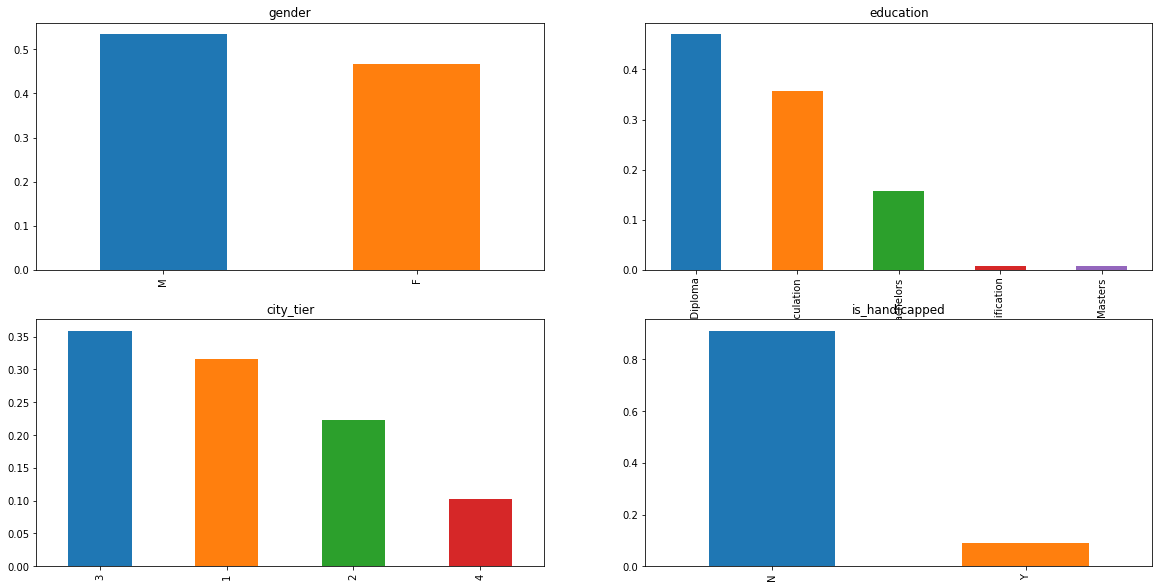

In [6]:
plt.figure(1)
plt.subplot(221)
train['gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'gender')

plt.subplot(222)
train['education'].value_counts(normalize=True).plot.bar(title= 'education')

plt.subplot(223)
train['city_tier'].value_counts(normalize=True).plot.bar(title= 'city_tier')

plt.subplot(224)
train['is_handicapped'].value_counts(normalize=True).plot.bar(title= 'is_handicapped')

plt.show()

c:\users\nitesh gowda\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


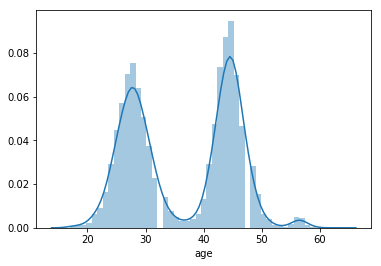

In [7]:
df = train.dropna()
sns.distplot(df['age']);

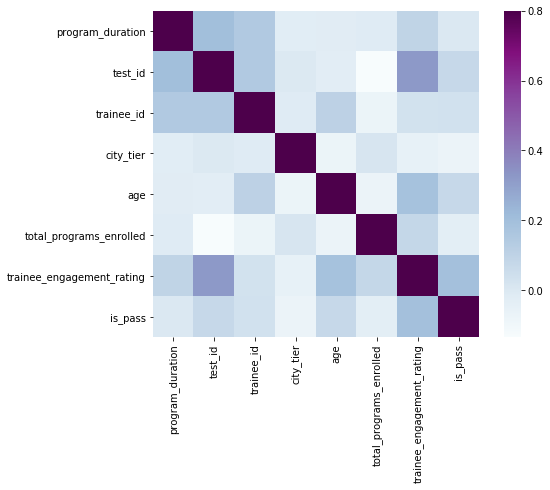

In [8]:
matrix = train.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

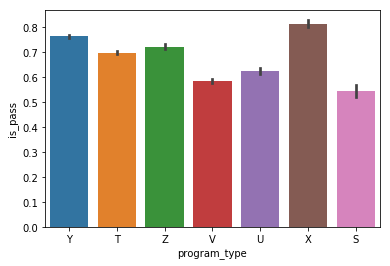

In [9]:
sns.barplot(train['program_type'], train['is_pass'])

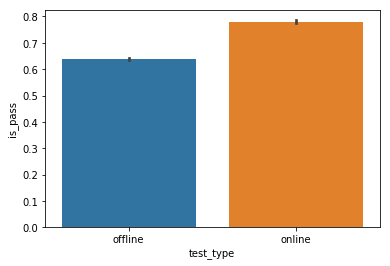

In [10]:
sns.barplot(train['test_type'], train['is_pass'])

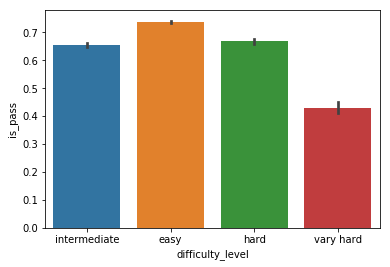

In [11]:
sns.barplot(train['difficulty_level'], train['is_pass'])

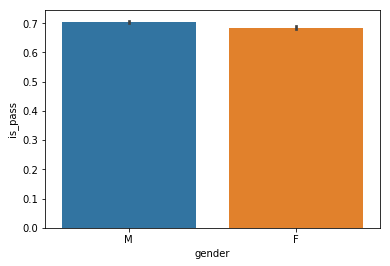

In [12]:
sns.barplot(train['gender'], train['is_pass'])

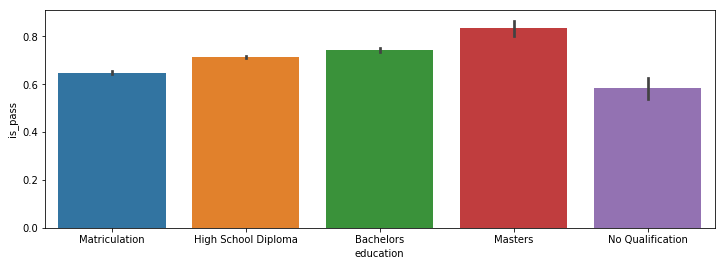

In [13]:
plt.figure(figsize=(12,4))
sns.barplot(train['education'], train['is_pass'])

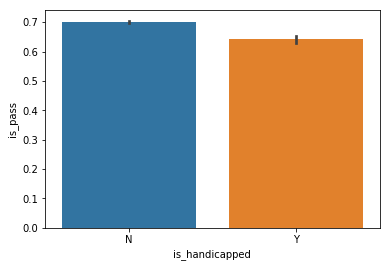

In [14]:
sns.barplot(train['is_handicapped'], train['is_pass'])

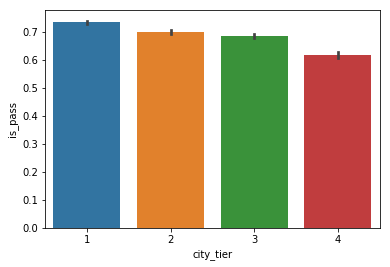

In [15]:
sns.barplot(train['city_tier'], train['is_pass'])

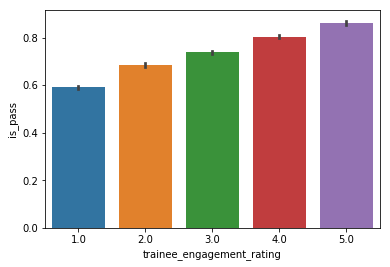

In [16]:
sns.barplot(train['trainee_engagement_rating'], train['is_pass'])

In [27]:
train['age'].fillna(train['age'].median(), inplace=True)
train['trainee_engagement_rating'].fillna(train['trainee_engagement_rating'].mode()[0], inplace=True)
test['age'].fillna(train['age'].median(), inplace=True)
test['trainee_engagement_rating'].fillna(train['trainee_engagement_rating'].mode()[0], inplace=True)

In [28]:
train=train.drop(['id', 'trainee_id', 'test_id'], axis=1)
test=test.drop(['id', 'trainee_id', 'test_id'], axis=1)

In [29]:
df = pd.concat([train,test], ignore_index = True)

In [32]:
df_new = pd.get_dummies(df, columns = ['test_type','is_handicapped','gender'] )
ordered_education = ['No Qualification','Matriculation','High School Diploma','Bachelors','Masters']
df_new['education'] = df_new['education'].astype("category",ordered=True,categories=ordered_education).cat.codes
ordered_diff = ['easy','intermediate','hard','vary hard']
df_new['difficulty_level'] = df_new['difficulty_level'].astype("category",ordered=True,categories=ordered_diff).cat.codes
df_new = pd.get_dummies(df_new, columns = ['program_type'])
df_new['duration_per_program'] = df_new['program_duration']/df_new['total_programs_enrolled']
df_new['education'] = df_new['education']+1
df_new['age_by_edu'] = df_new['age']/df_new['education']
train = df_new[:73147]
test = df_new[73147:]

c:\users\nitesh gowda\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\nitesh gowda\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  """


In [33]:
X = train.drop('is_pass',1)
y = train.is_pass

In [20]:
X=pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [21]:
print(train.head(5))

   program_duration  city_tier   age  total_programs_enrolled  \
0               136          3  24.0                        5   
1               131          4  26.0                        2   
2               120          1  40.0                        1   
3               117          3  39.0                        4   
4               131          1  42.0                        2   

   trainee_engagement_rating  is_pass  program_id_S_1  program_id_S_2  \
0                        1.0        0               0               0   
1                        3.0        1               0               0   
2                        2.0        1               0               0   
3                        1.0        1               0               0   
4                        4.0        1               0               0   

   program_id_T_1  program_id_T_2        ...         \
0               0               0        ...          
1               1               0        ...          
2    

In [31]:
print(X.head(5))

   program_duration  city_tier   age  total_programs_enrolled  \
0               136          3  24.0                        5   
1               131          4  26.0                        2   
2               120          1  40.0                        1   
3               117          3  39.0                        4   
4               131          1  42.0                        2   

   trainee_engagement_rating  program_id_S_1  program_id_S_2  program_id_T_1  \
0                        1.0               0               0               0   
1                        3.0               0               0               1   
2                        2.0               0               0               0   
3                        1.0               0               0               0   
4                        4.0               0               0               0   

   program_id_T_2  program_id_T_3        ...         \
0               0               0        ...          
1               0 

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score

In [ ]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = X.loc[train_index],X.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
    
     model = LogisticRegression(random_state=1)
     model.fit(xtr, ytr)
     pred=model.predict_proba(xvl)[:,1]
     score = roc_auc_score(yvl,pred)
     print('roc_auc_score',score)
     i+=1
# Making predictions for the test data
pred=model.predict_proba(test)[:,1]